<a href="https://colab.research.google.com/github/Namesakenberg/machine_learning/blob/main/LASSO_regularization_(L1_norm)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# creating a sample data set
from sklearn.datasets import make_regression
X,y =make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise = 20,random_state=13)



In [3]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

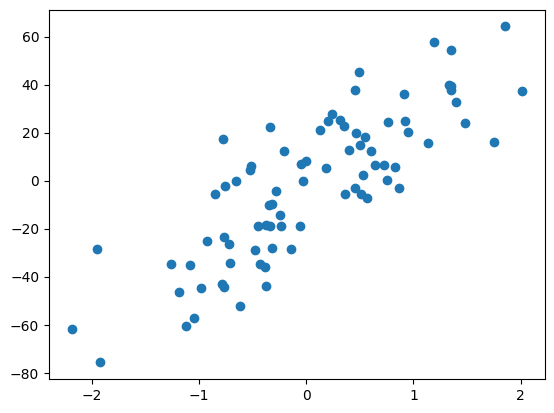

In [4]:
plt.scatter(X_train , y_train)

In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train , y_train)
y_pred = lr.predict(X_test)
print("slope :",lr.coef_)
print("intercept",lr.intercept_)
from sklearn.metrics import r2_score
print("r2_score",r2_score(y_test , y_pred ))

slope : [28.02954717]
intercept -3.0235440518457803
r2_score 0.7939754101664196


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.192e+04, tolerance: 7.292e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

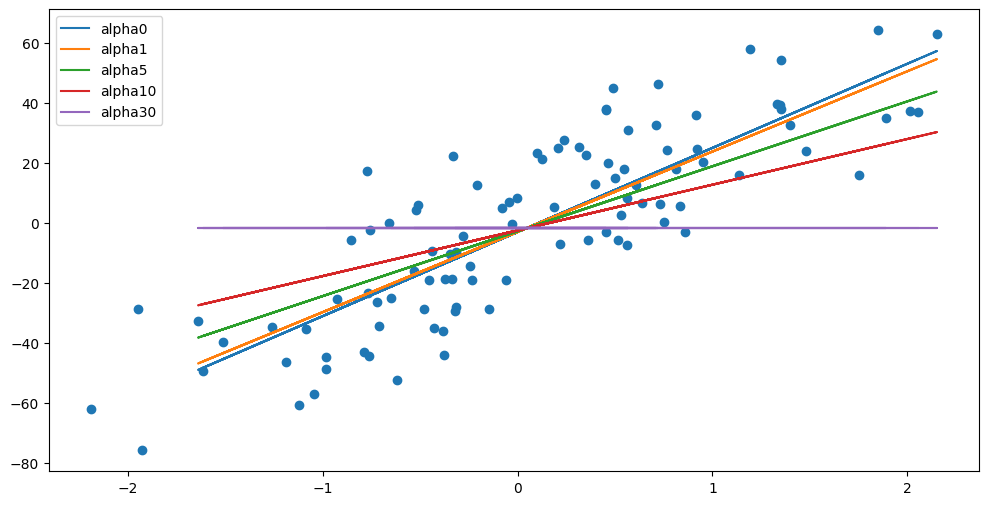

In [6]:
# alpha -> lambda = hperparameter

# applying lasso regression using various values of alpha to see the relation between lambda and slope

from sklearn.linear_model import Lasso
alphas = [0,1,5,10,30]
plt.figure(figsize=(12,6))
plt.scatter(X,y)
for i in alphas:
  L=Lasso(alpha = i)
  L.fit(X_train,y_train)
  plt.plot(X_test,L.predict(X_test),label='alpha{}'.format(i))
plt.legend()
plt.show()


In ridge regression , if we increase the value of alpha the values of the parameters would shrink and would be close to 0 , but they would never be 0.

But in the case of LASSO we can see that if the the value of lambda is set too high then the slope becomes 0.

since the slope is 0 , the prediction will be purely based on the intercept term , hence this is the clear case of underfitting

## How are coefficients affected for different parameters

In [7]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
df = pd.DataFrame(data.data , columns = data.feature_names)
df['target'] = data.target

In [8]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [9]:
X = df.drop(columns='target')
y = df['target']

In [10]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state=2)

In [11]:
print(X_train.shape)
print(X_test.shape)

(353, 10)
(89, 10)


In [12]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
coeffs = []
r2scores = []
for i in [0,0.1,1,10]:
  reg = Lasso(alpha = i)      # applying lasso for range of parameters
  reg.fit(X_train , y_train)
  y_pred = reg.predict(X_test)
  coeffs.append(reg.coef_)        # appending the values of coefficents and r2_scores
  r2scores.append(r2_score(y_test , y_pred))




/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

Text(0.5, 1.0, 'Alpha = 10 ,r2_score = -0.01')

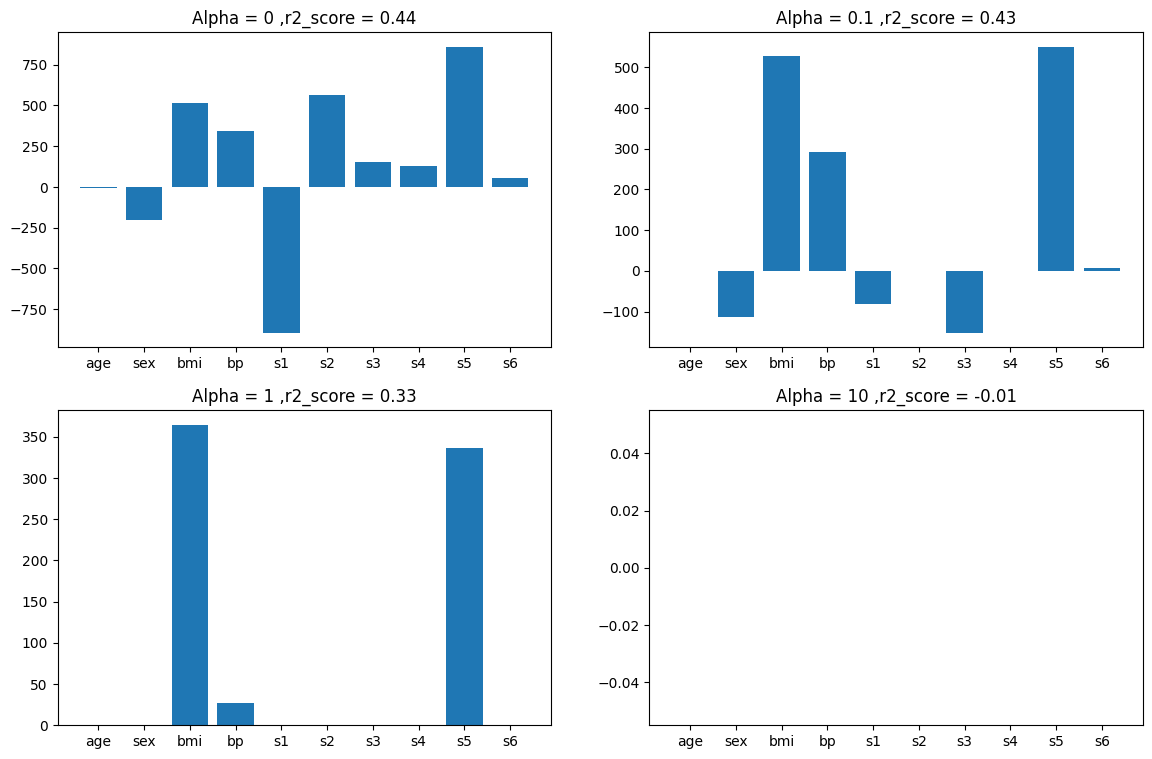

In [13]:
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names,coeffs[0])
plt.title('Alpha = 0 ,r2_score = {}'.format(round(r2scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names,coeffs[1])
plt.title('Alpha = 0.1 ,r2_score = {}'.format(round(r2scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names,coeffs[2])
plt.title('Alpha = 1 ,r2_score = {}'.format(round(r2scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names,coeffs[3])
plt.title('Alpha = 10 ,r2_score = {}'.format(round(r2scores[3],2)))

## in every graph the important columns always remain (bmi , bp and s5) in case of alpha=0 (linear regression)

## for alpha = 0.1 , 1 -> some less important columns perish

## while in the case of alpha = 10 , the coefficient value is so high that , all the parameters are 0. (huge underfitting)

## Higher coefficients are affected more for higher value of lambda


In [20]:
lambdas  = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
coefs =[]
for i in lambdas:
  reg = Lasso(alpha = i )
  reg.fit(X_train,y_train)
  coefs.append(reg.coef_.tolist())

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

In [21]:
input_array = np.array(coefs)
coef_df = pd.DataFrame(input_array,columns = data.feature_names)
coef_df['alpha'] = lambdas
coef_df.set_index('alpha')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,-9.158653,-205.454322,516.693745,340.619999,-895.551989,561.220669,153.893104,126.731395,861.126997,52.421122
0.0001,-9.069064,-205.329406,516.789418,340.532379,-888.660904,555.958584,150.593655,125.450143,858.645541,52.380294
0.0010,-8.262770,-204.205364,517.650073,339.743901,-826.663603,508.617395,120.908607,113.921773,836.320753,52.012849
0.0100,-1.359721,-192.937180,526.356514,332.641101,-430.226975,191.295480,-44.034913,68.988987,688.396028,47.940616
0.1000,0.000000,-113.969928,526.744396,292.628472,-82.693681,-0.000000,-152.685338,0.000000,551.080291,7.170992
1.0000,0.000000,0.000000,363.885742,27.273163,0.000000,0.000000,-0.000000,0.000000,336.137262,0.000000
10.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
100.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
1000.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


# impact of bias and variance on the value of lambda

In [ ]:
# as the value of bias increases and variance decreases with increase in lambda
# hence pick a value where bias and variance are close to each other

## effect of loss function on increase in lambda

In [ ]:
# as alpha increases the loss function also increases , stays at a point where alpha is 0 and then increases again